# import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

## This statement allows the visuals to render within your Jupyter Notebook.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import NearestNeighbors
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
#from ydata_profiling import ProfileReport
%matplotlib inline

### 1- is The data Reliable : Yes it is because is from the larget website for transfor market https://www.transfermarkt.com/

### 2- is The data Timeliness : No it is from 2 season 2021-2022 and 2022-2023 

### 3- is The data Consistency : Yes

In [2]:
# read The Csv file as DataFream
df_ball = pd.read_csv("final_data.csv")
df_ball.head(5)

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


In [3]:
# Explor data using ydata libaray
#ProfileReport(df_ball, title="Profiling Report")

# Preprocess the Data
## 1. Simple EDA + Data Quality checking

In [4]:
df_ball["clean sheets"]

0        0.335463
1        0.207055
2        0.924658
3        0.000000
4        0.000000
           ...   
10749    0.000000
10750    0.000000
10751    0.000000
10752    0.000000
10753    0.000000
Name: clean sheets, Length: 10754, dtype: float64

In [5]:
df_ball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

In [6]:
# Check if there is duplicated values
df_ball.duplicated().value_counts()

False    10754
Name: count, dtype: int64

In [7]:
# Check if there is null values
df_ball.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [8]:
# check if we can encode teams
check_teams = df_ball["team"].value_counts()

check_teams[check_teams < 25]

team
Sevilla FC                     24
Real Valladolid CF             24
Bristol City                   24
RCD Mallorca                   24
CA Colon                       24
Manchester City                24
Real Madrid                    24
Club Necaxa                    24
Club Atlético Tucumán          24
CA Vélez Sarsfield             24
CF Monterrey                   24
CA Independiente               24
PSV Eindhoven                  24
UNAM Pumas                     24
Leeds United                   24
Sparta Rotterdam               24
Deportivo Toluca               24
Twente Enschede FC             24
Fulham FC                      24
Central Coast Mariners         24
FK Rostov                      24
Preston North End              24
Stoke City                     24
Rio Ave FC                     24
Aston Villa                    23
Arsenal FC                     23
Sydney FC                      23
Wellington Phoenix             23
Zenit St. Petersburg           23
Villarrea

# some personl Q (:

In [9]:
df_top10 =df_ball.sort_values(by="highest_value" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "highest_value",width=1000,height=700)
fig

In [10]:
df_top10 =df_ball.sort_values(by="award" , ascending=False).head(10)
fig= px.bar(df_top10 , x="name", y = "award",width=1000,height=700)
fig

In [11]:
df_postions =df_ball["position"].value_counts()
fig = px.pie(df_postions , names=df_postions.index , values= df_postions.values)
fig

In [12]:
# Remove Columns That we will not Use it 
df_ball = df_ball.drop(columns=["player","name"], axis=1)

In [13]:
df_ball.columns

Index(['team', 'position', 'height', 'age', 'appearance', 'goals', 'assists',
       'yellow cards', 'second yellow cards', 'red cards', 'goals conceded',
       'clean sheets', 'minutes played', 'days_injured', 'games_injured',
       'award', 'current_value', 'highest_value', 'position_encoded',
       'winger'],
      dtype='object')

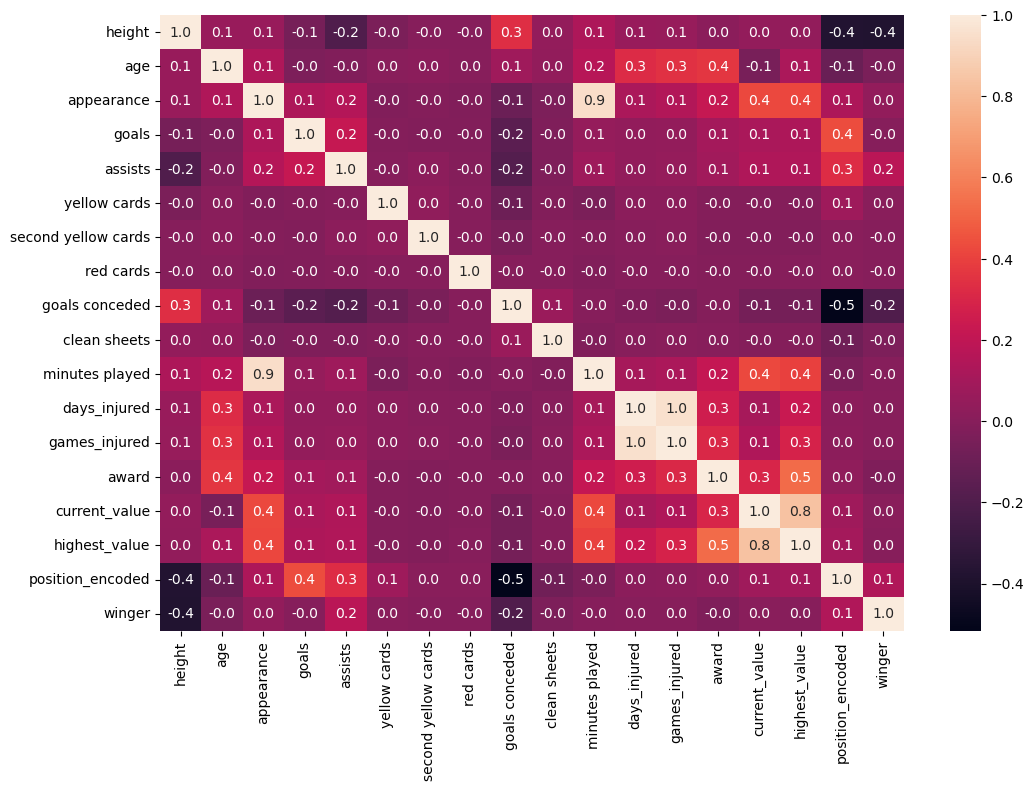

In [14]:
# find the corrlation bettween columns
corr = df_ball.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True,fmt=".1f")
plt.show()

# Scatter plot for some relations

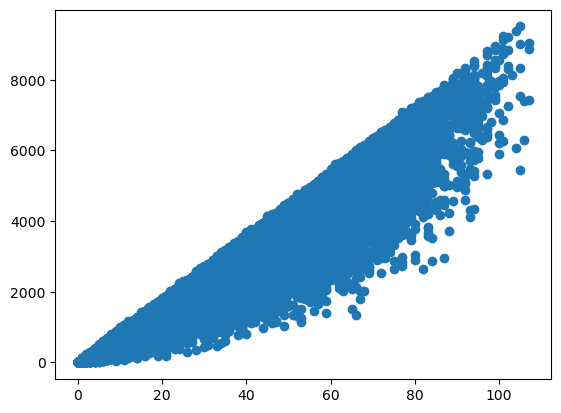

In [15]:
# check corrlation between appearance and miuntes played
plt.scatter(df_ball["appearance"],df_ball["minutes played"])
plt.show()

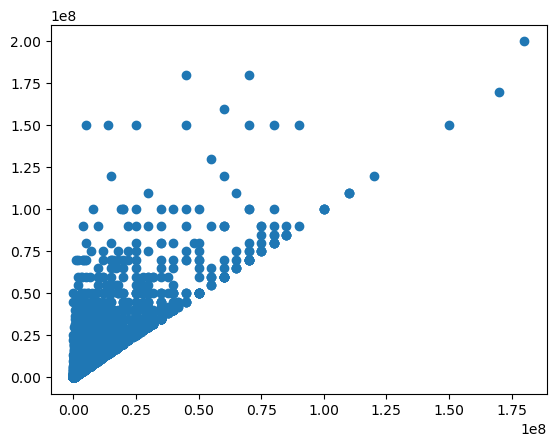

In [16]:
plt.scatter(df_ball["current_value"],df_ball["highest_value"])
plt.show()

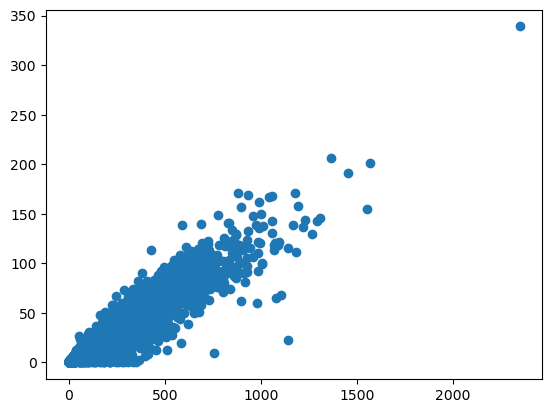

In [17]:
plt.scatter(df_ball["days_injured"],df_ball["games_injured"])
plt.show()

# Remove Outlier

(10587, 20)

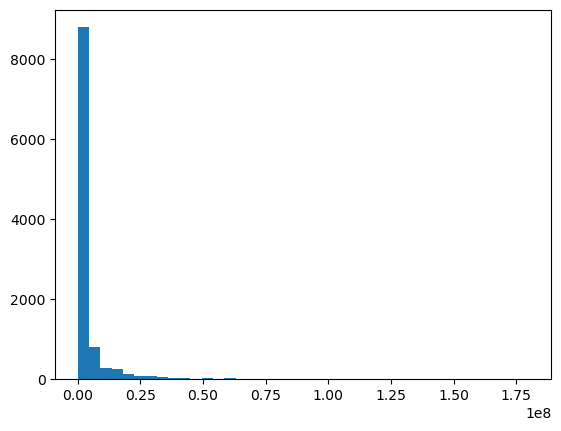

In [18]:
# cut the values the above 15m 
df_ball = df_ball[df_ball["current_value"] > 0]
plt.hist(df_ball["current_value"],bins=40)
df_ball.shape

(10582, 20)

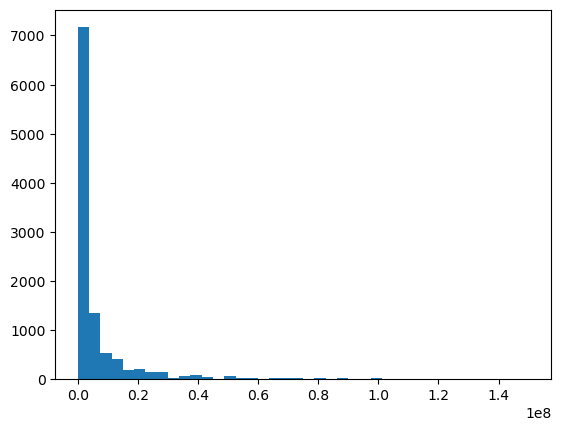

In [19]:
df_ball= df_ball[df_ball["highest_value"] <= 150000000]
plt.hist(df_ball["highest_value"],  bins=40)
df_ball.shape

In [20]:
df_ball.shape

(10582, 20)

####  Feature engineering

In [21]:
# one hot coding
categorical_features = ["position","team"]
df_ball = pd.get_dummies(df_ball, columns=categorical_features)

In [22]:
df_ball.shape

(10582, 408)

####  Feature selection

In [23]:
corr = df_ball.corr(numeric_only=True)
corr["current_value"].sort_values(ascending=False)

current_value                1.000000
highest_value                0.831351
appearance                   0.426384
minutes played               0.425784
award                        0.278204
                               ...   
team_Daejeon Hana Citizen   -0.025399
position_midfield           -0.030158
age                         -0.059010
goals conceded              -0.065153
position_Goalkeeper         -0.079198
Name: current_value, Length: 408, dtype: float64

In [24]:
threshold = 0.10 # You can change this value based on your requirement

# Filter the correlations
# We use `abs()` for absolute value to consider both strong positive and negative correlations
selected_features = corr[abs(corr['current_value']) > threshold]['current_value'].index
selected_features

Index(['appearance', 'goals', 'assists', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'team_Arsenal FC', 'team_Bayern Munich', 'team_Chelsea FC',
       'team_FC Barcelona', 'team_Liverpool FC', 'team_Manchester City',
       'team_Manchester United', 'team_Paris Saint-Germain',
       'team_Real Madrid', 'team_SSC Napoli', 'team_Tottenham Hotspur'],
      dtype='object')

In [25]:
# select the columns that have corr with our target 
df_ball_1 = df_ball[selected_features]
df_ball_1.head()

,appearance,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_Real Madrid,team_SSC Napoli,team_Tottenham Hotspur
0,104,0.000000,0.000000,9390,42,5,13,15000000,70000000,False,False,False,False,False,False,True,False,False,False,False
1,15,0.000000,0.000000,1304,510,58,1,1500000,22000000,False,False,False,False,False,False,True,False,False,False,False
2,4,0.000000,0.000000,292,697,84,4,600000,6000000,False,False,False,False,False,False,True,False,False,False,False
3,82,0.028090,0.056180,6408,175,22,9,50000000,50000000,False,False,False,False,False,False,True,False,False,False,False
4,63,0.017889,0.017889,5031,238,51,21,40000000,80000000,False,False,False,False,False,False,True,False,False,False,False


In [26]:
# drop this columns because they have corrlation with other indeependent varible
df_ball_1.drop(columns=["appearance"],axis=1,inplace=True)

C:\Users\zyad abdallah\AppData\Local\Temp\ipykernel_23496\829671145.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [27]:
df_ball_1.head()

,goals,assists,minutes played,days_injured,games_injured,award,current_value,highest_value,team_Arsenal FC,team_Bayern Munich,team_Chelsea FC,team_FC Barcelona,team_Liverpool FC,team_Manchester City,team_Manchester United,team_Paris Saint-Germain,team_Real Madrid,team_SSC Napoli,team_Tottenham Hotspur
0,0.000000,0.000000,9390,42,5,13,15000000,70000000,False,False,False,False,False,False,True,False,False,False,False
1,0.000000,0.000000,1304,510,58,1,1500000,22000000,False,False,False,False,False,False,True,False,False,False,False
2,0.000000,0.000000,292,697,84,4,600000,6000000,False,False,False,False,False,False,True,False,False,False,False
3,0.028090,0.056180,6408,175,22,9,50000000,50000000,False,False,False,False,False,False,True,False,False,False,False
4,0.017889,0.017889,5031,238,51,21,40000000,80000000,False,False,False,False,False,False,True,False,False,False,False


# Traing Step

In [28]:
x = df_ball_1

# sacle the data
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [29]:
x_scaled.shape

(10582, 19)

## Buliding the Models


In [30]:
# 2. Use NearestNeighbors to find the optimal eps
min_samples = 3

In [31]:
nn = NearestNeighbors(n_neighbors=min_samples)
nn.fit(x_scaled)
distances, indices = nn.kneighbors(x_scaled)

c:\Users\zyad abdallah\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\zyad abdallah\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [32]:
distances[:,min_samples-1]

array([3.50531599e+00, 2.70592776e+00, 4.09943609e+00, ...,
       1.33493886e-01, 1.11679662e-01, 3.57684655e-03])

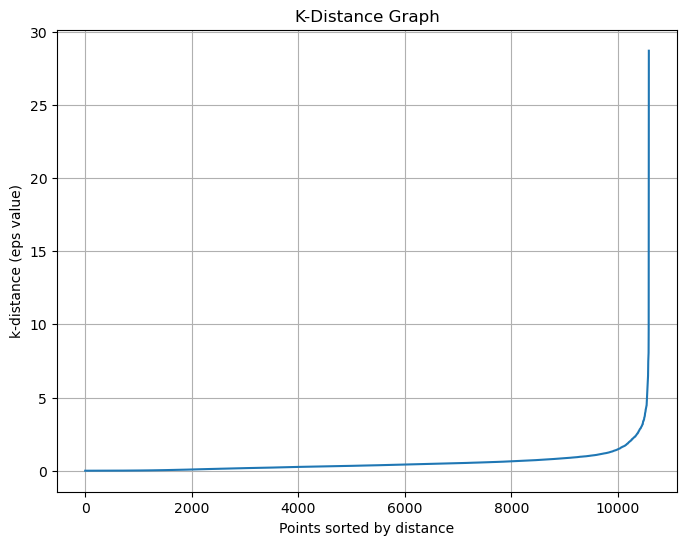

In [33]:
# The distance to the furthest neighbor (min_samples-th nearest) for each point
k_dist = distances[:, min_samples-1]

# Sort distances
k_dist_sorted = np.sort(k_dist)

# 3. Plotting the k-distance graph
plt.figure(figsize=(8, 6))
plt.plot(k_dist_sorted)
plt.title('K-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel('k-distance (eps value)')
plt.grid(True)
plt.show()

In [62]:
# 4. Apply DBSCAN with chosen eps and min_samples
# Typically, you choose eps at the "elbow" point in this plot, where the slope changes significantly
chosen_eps = 1.5 # This is an example; choose this value based on the plot
dbscan = DBSCAN(eps=chosen_eps, min_samples=min_samples)

## Train The model

In [63]:
# Fit the model on the training data

clusters = dbscan.fit_predict(x_scaled)

# Evaluating the Model


In [64]:
# using silhouette score to evalute unsupervised models
silhouette_avg = silhouette_score(x, clusters)
silhouette_avg

-0.15419671492619777

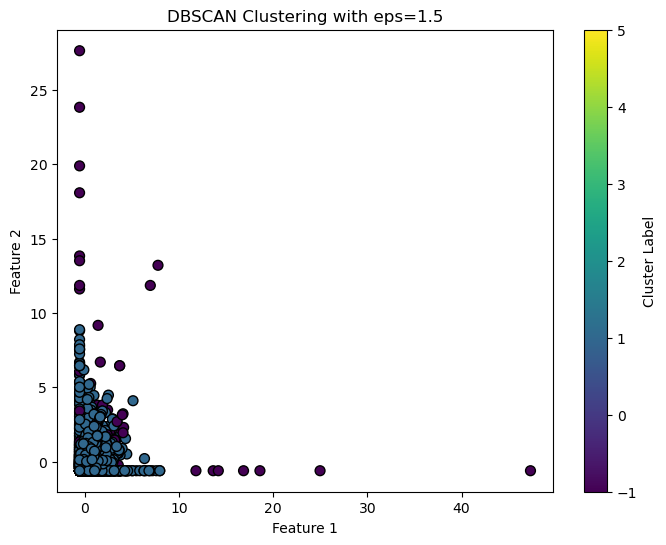

In [65]:
# 5. Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(x_scaled[:, 0], x_scaled[:, 1], c=clusters, cmap='viridis', s=50, edgecolor='k')
plt.title(f'DBSCAN Clustering with eps={chosen_eps}')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [66]:
x['dbscan'] = clusters

C:\Users\zyad abdallah\AppData\Local\Temp\ipykernel_23496\2460018179.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [67]:

x['dbscan'].value_counts()

dbscan
 1    10063
-1      497
 4        7
 0        5
 2        4
 5        3
 3        3
Name: count, dtype: int64

<Axes: xlabel='highest_value', ylabel='current_value'>

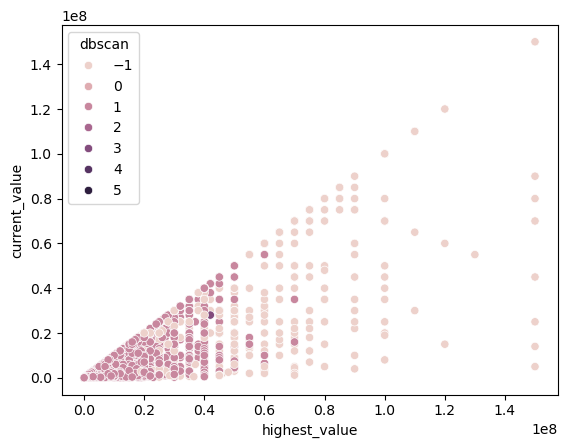

In [68]:
sns.scatterplot(data = x, x = 'highest_value', y = 'current_value', hue = 'dbscan')


<Axes: xlabel='minutes played', ylabel='current_value'>

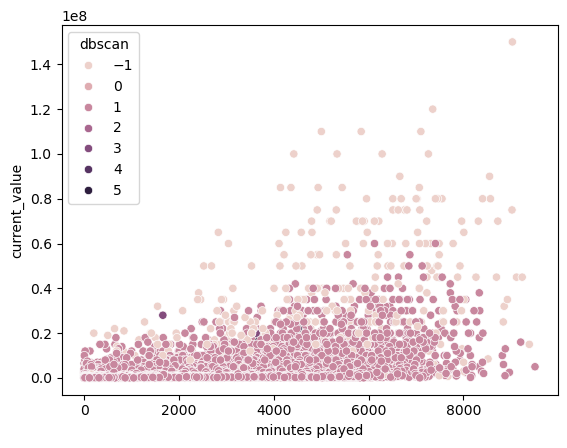

In [69]:
sns.scatterplot(data = x, x = 'minutes played', y = 'current_value', hue = 'dbscan')


<Axes: xlabel='minutes played', ylabel='highest_value'>

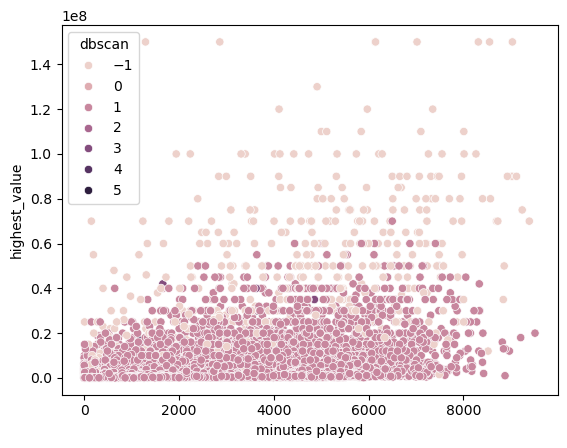

In [70]:
sns.scatterplot(data = x, x = 'minutes played', y = 'highest_value', hue = 'dbscan')